# Costumers Segmentation with K-Means 

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value
from sklearn.cluster import KMeans

## Import Data

In [2]:
df = pd.read_csv("data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

Data terdiri dari 440 baris dan 8 kolom.

In [4]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Tipe data telah sesuai.

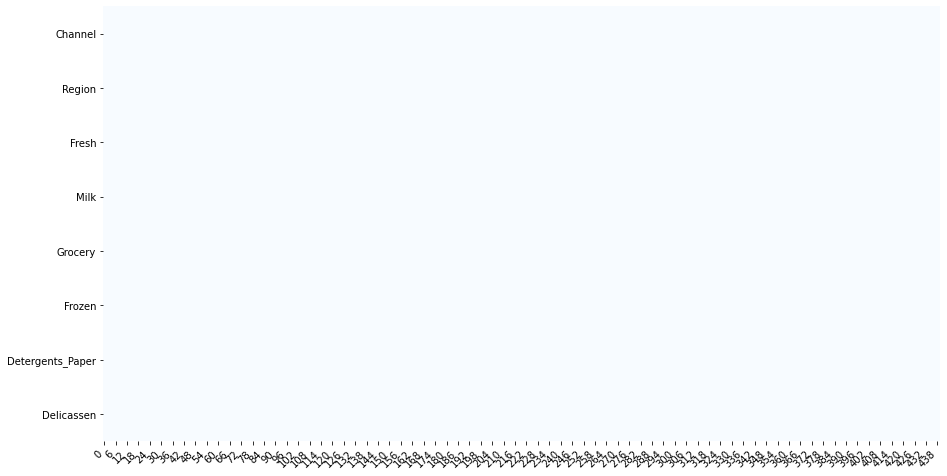

In [5]:
plot_missing_value(df)

Data telah bersih.

# Exploratory Data Analysis (EDA)

## Statistik Deskriptif

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [8]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

## Numeric 

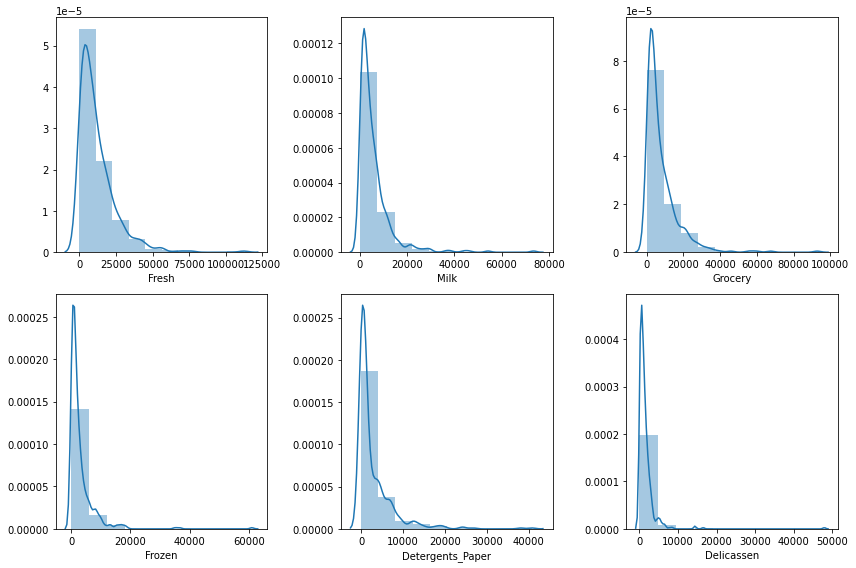

In [9]:
numeric = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
a = plt.figure(figsize=(12, 8))

for i, j in enumerate(numeric):
    a.add_subplot(2, 3, i+1)
    sns.distplot(df[j], bins=10)
    a.tight_layout()

Adapun insight yang dapat ditarik adalah sebagai berikut : 
* Fresh frekuensi tertinggi berada pada rentang ± 0 - 10000 (skew positif).
* Milk frekuensi tertinggi berada pada rentang ± 0 - 10000 (skew positif).
* Grocery frekuensi tertinggi berada pada rentang ± 0 - 10000 (skew positif).
* Frozen frekuensi tertinggi berada pada rentang ± 0 - 5000 (skew positif).
* Detergents_Paper frekuensi tertinggi berada pada rentang ± 0 - 5000 (skew positif).
* Delicassen frekuensi tertinggi berada pada rentang ± 0 - 5000 (skew positif).

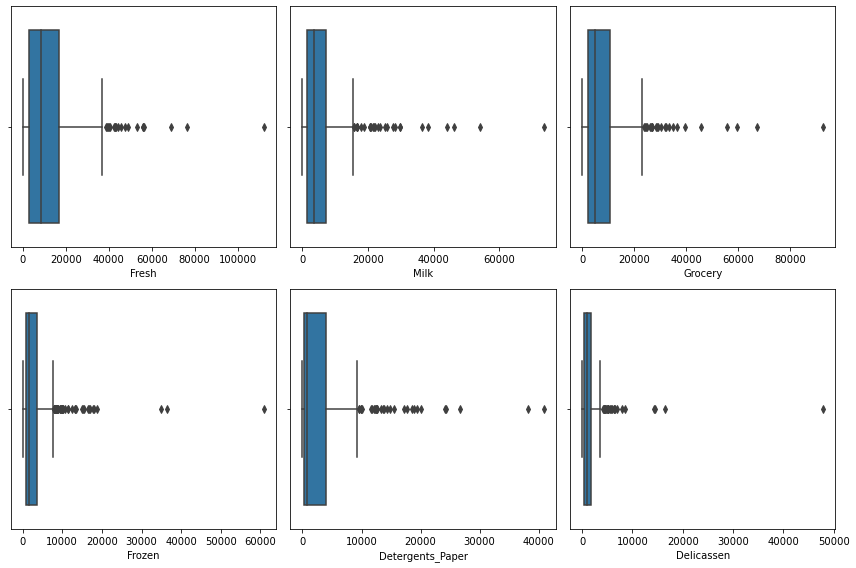

In [10]:
numeric = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
a = plt.figure(figsize=(12, 8))

for i, j in enumerate(numeric):
    a.add_subplot(2, 3, i+1)
    sns.boxplot(df[j])
    a.tight_layout()

Dapat dilihat pada boxplot di atas bahwa variabel/fitur memiliki banyak outlier.

## Categoric 

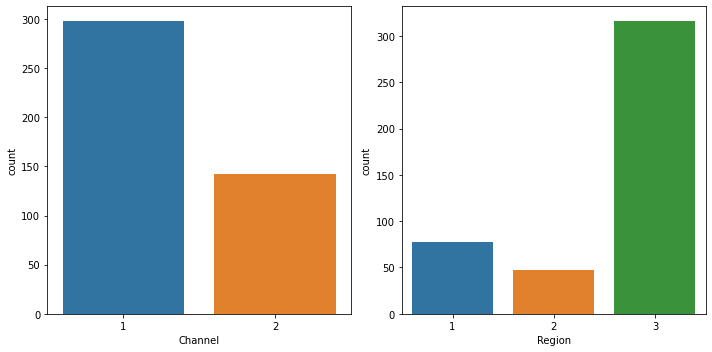

In [11]:
categoric = ['Channel','Region']
b = plt.figure(figsize=(10, 5))

for i, j in enumerate(categoric):
    b.add_subplot(1, 2, i+1)
    sns.countplot(df[j])
    b.tight_layout()

Adapun insight yang dapat ditarik adalah sebagai berikut : 
* Channel 1 memiliki frekuensi tertinggi dengan perbedaan yang signifikan. 
* Region 3 memiliki frekuensi tertinggi dengan perbedaan yang sangat signifikan. 

## Korelasi 
Karena saya menggunakan pearson correlation yang memiliki asumsi data berdistribusi secara normal. Maka, saya harus melakukan transformasi data.

In [12]:
from sklearn.preprocessing import PowerTransformer

In [13]:
pwr = PowerTransformer()

In [14]:
df_trans = pwr.fit_transform(df)

In [15]:
df_trans = pd.DataFrame(df_trans, columns=df.columns)
df_trans.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.622074,0.413012,0.979454,0.394901,-1.457973,0.620530,0.338074
1,1.448652,0.622074,-0.110911,0.995243,0.628376,0.080081,0.751556,0.602222
2,1.448652,0.622074,-0.195814,0.888063,0.410688,0.332499,0.793104,2.240051
3,-0.690297,0.622074,0.458126,-0.965336,-0.154740,1.173953,-0.372736,0.608674
4,1.448652,0.622074,1.028870,0.412660,0.346961,0.742061,0.367767,1.737333


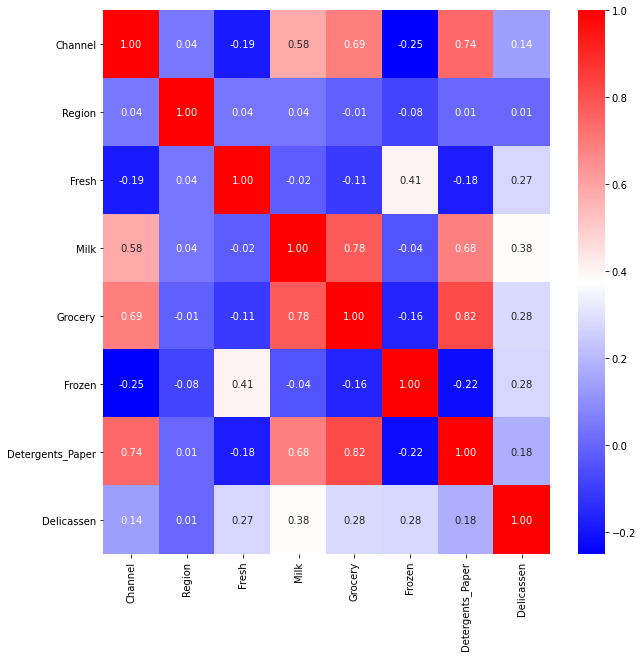

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_trans.corr(), annot=True, fmt='.2f', cmap='bwr');

* Milk berkorelasi positif cukup kuat dengan Detergents_Paper dan Grocery.
* Grocery berkorelasi positif kuat dengan Detergents_Paper.

In [17]:
df.groupby('Channel').mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


* Channel 1 memiliki rata-rata Fresh yang tinggi. Itu berarti orang-orang dari channel 1 suka berbelanja fresh product.
* Channel 2 memiliki rata-rata Grocery yang tinggi.

In [18]:
df.groupby('Region').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


* Region 1 dan 3 memiliki rata-rata Fresh yang tinggi. Itu berarti orang-orang dari region 1 dan 3 suka berbelanja fresh product.
* Region 2 memiliki rata-rata Fresh dan Grocery yang tinggi.

# Segmentation with K-Means 

## Tentukan jumlah cluster => Elbow method

In [19]:
df2 = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
df2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


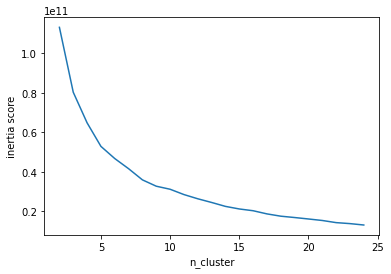

In [20]:
score = []

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    score.append(kmeans.inertia_)

plt.plot(range(2, 25), score)
plt.xlabel('n_cluster')
plt.ylabel('inertia score');

Kita akan coba n_cluster 3 - 5.

## Training 
Sebelum training menggunakan K-Means jika diperlukan bisa dilakukan feature scaling. Tapi pada data ini saya rasa tidak diperlukan karena antar fitur skalanya tidak begitu berbeda jauh.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(df2)
centroid = kmeans.cluster_centers_

In [22]:
df_hasil = df2.copy()
df_hasil['cluster'] = cluster

In [23]:
df_hasil

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


## Interpretasi hasil clustering 

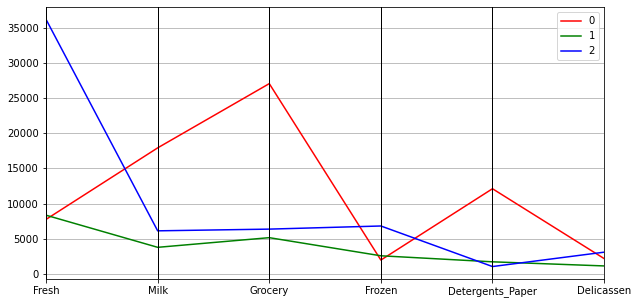

In [24]:
plt.figure(figsize=(10, 5))

dfC = pd.DataFrame(centroid, columns=df2.columns)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r','g','b'));

Interpretasi hasil clustering : 
* Cluster 0 costumer yang suka belanja Milk, Grocery dan Detergents_Paper product. 
* Cluster 1 costumer yang hemat. 
* Cluster 2 costumer yang suka belanja Fresh product. 

## Visualisasi hasil clustering dengan t-SNE

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2, random_state=42)

In [27]:
df_tsne = tsne.fit_transform(df2)

In [28]:
df_tsne.shape

(440, 2)

In [29]:
labels = {
    0: 'cluster 1',
    1: 'cluster 2', 
    2: 'cluster 3'
}

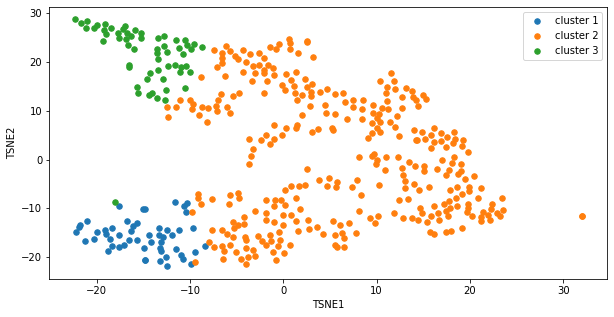

In [30]:
plt.figure(figsize=(10, 5))

for i in range(3):
    mask = cluster == i
    plt.scatter(df_tsne[mask, 0], df_tsne[mask, 1], s=30, label=labels[i])

plt.legend()
plt.xlabel('TSNE1')
plt.ylabel('TSNE2');

Dapat kita lihat pada plot di atas walaupun ada beberapa data yang agak tercampur. Namun, secara keseluruhan hasil clustering masih bisa dikatakan cukup baik. Terlebih lagi hasil clustering dapat diinterpretasikan dengan baik.